In [288]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay,roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [265]:
filename = 'data_evaluacion.csv'
#filename='data.csv'
df = pd.read_csv(filename)
print (df.shape)
df.head(5)

(48841, 15)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [266]:
#df.nunique()

In [267]:
#Dar nombres a las columnas
nombre_columna = ['edad', 'empleador_tipo', 'peso', 'educacion', 'numero_educacion', 'estado_civil', 
                'ocupacion', 'relacion', 'raza', 'sexo', 'ganancia', 'perdida', 
                'horas_semana', 'pais_natal', 'ingresos']

df.columns=nombre_columna


In [268]:
#reemplazamos los registos ? con valores nulos
df[df == '?'] = np.nan
df.info()

for col in ['empleador_tipo', 'ocupacion', 'pais_natal']:
    mode_value = df[col].mode()[0]  
    df[col] = df[col].fillna(mode_value) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edad              48841 non-null  int64 
 1   empleador_tipo    46042 non-null  object
 2   peso              48841 non-null  int64 
 3   educacion         48841 non-null  object
 4   numero_educacion  48841 non-null  int64 
 5   estado_civil      48841 non-null  object
 6   ocupacion         46032 non-null  object
 7   relacion          48841 non-null  object
 8   raza              48841 non-null  object
 9   sexo              48841 non-null  object
 10  ganancia          48841 non-null  int64 
 11  perdida           48841 non-null  int64 
 12  horas_semana      48841 non-null  int64 
 13  pais_natal        47984 non-null  object
 14  ingresos          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [269]:
#df.nunique()

In [270]:
#Ver si existen datos nulos
#df.isnull().sum()

In [271]:
#Dividir las variables x y y
#x = df.drop(['ingresos','peso','estado_civil','relacion'], axis=1)
x = df.drop(['ingresos'], axis=1)
y = df['ingresos']


In [272]:
categorizar = ['sexo', 'raza', 'empleador_tipo', 'educacion', 'estado_civil', 'ocupacion', 'relacion', 'pais_natal']
#categorizar = ['sexo', 'raza', 'empleador_tipo', 'educacion',  'ocupacion', 'pais_natal']
# Crear una instancia de LabelEncoder
le = LabelEncoder()
# Aplicar LabelEncoder a cada columna categórica
"""for col in categorizar:
    x[col] = le.fit_transform(x[col])"""
#Get dami
x = pd.get_dummies(x, columns=categorizar)
x



,edad,peso,numero_educacion,ganancia,perdida,horas_semana,sexo_Female,sexo_Male,raza_Amer-Indian-Eskimo,raza_Asian-Pac-Islander,...,pais_natal_Portugal,pais_natal_Puerto-Rico,pais_natal_Scotland,pais_natal_South,pais_natal_Taiwan,pais_natal_Thailand,pais_natal_Trinadad&Tobago,pais_natal_United-States,pais_natal_Vietnam,pais_natal_Yugoslavia
0,50,83311,13,0,0,13,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,215646,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,53,234721,7,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,28,338409,13,0,0,40,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,37,284582,14,0,0,40,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,215419,13,0,0,36,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48837,64,321403,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,38,374983,13,0,0,50,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,44,83891,13,5455,0,40,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False


In [273]:
categorizar = ['sexo', 'raza', 'ingresos','empleador_tipo', 'educacion', 'estado_civil', 'ocupacion', 'relacion', 'pais_natal']

le = LabelEncoder()

# Aplicar LabelEncoder a cada columna categórica
for col in categorizar:
    df[col] = le.fit_transform(df[col])
correlaciones = df.corr()['ingresos'].sort_values(ascending=False)
print(correlaciones)

ingresos            1.000000
numero_educacion    0.332632
edad                0.230371
horas_semana        0.227687
ganancia            0.223015
sexo                0.214638
perdida             0.147553
educacion           0.080087
raza                0.070939
ocupacion           0.032533
pais_natal          0.020378
empleador_tipo     -0.000481
peso               -0.006351
estado_civil       -0.199064
relacion           -0.253218
Name: ingresos, dtype: float64


In [274]:
#Dividir en daos de prueba y entrenamiento

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)


In [275]:
#Normalizar
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [276]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [277]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: ', accuracy)
print(classification_report(y_test, y_pred))

Precisión:  0.859346208967447
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91     11147
        >50K       0.75      0.62      0.68      3506

    accuracy                           0.86     14653
   macro avg       0.82      0.78      0.79     14653
weighted avg       0.85      0.86      0.85     14653



In [278]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10429,   718],
       [ 1343,  2163]], dtype=int64)

<Figure size 5000x2000 with 0 Axes>

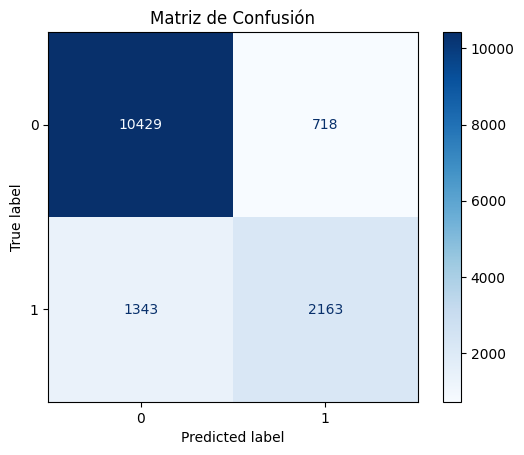

In [287]:
import matplotlib.ticker as ticker
plt.figure(figsize=(50, 20))  
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d') 
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# Evalaucion del modelo
print('Train Accuracy : %.5f' % model.score(x_train, y_train))
print('Test Accuracy : %.5f' % model.score(x_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Train Accuracy : 0.85024
Test Accuracy : 0.86023
Precisión del modelo: 0.8602333993038969
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91     11147
        >50K       0.75      0.62      0.68      3506

    accuracy                           0.86     14653
   macro avg       0.82      0.78      0.80     14653
weighted avg       0.85      0.86      0.86     14653



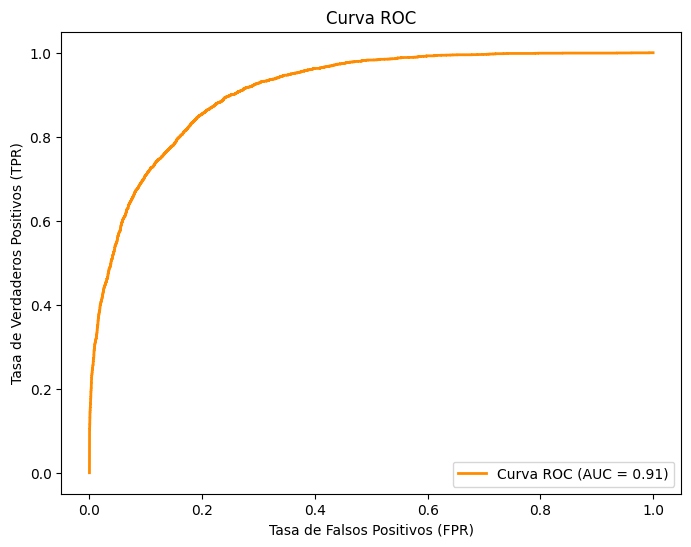

In [291]:
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Calcular la probabilidad predicha para la clase positiva
y_prob = model.predict_proba(x_test)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## Bibliografias
### Regresión Logística con Python y scikit-learn. (2023, November 10). Deepnote. https://deepnote.com/app/mazzaroli/Regresion-Logistica-con-Python-y-scikit-learn-cd6b9628-59c3-4496-8abc-8beb77d9b4ff